In [8]:
import freud
import numpy as np

import gsd.hoomd

from monk import render

In [14]:
box, pos = freud.data.make_random_system(box_size=10, num_points=100)

In [15]:
snap = gsd.hoomd.Snapshot()
snap.particles.position = pos
snap.particles.diameter = np.ones(len(pos))

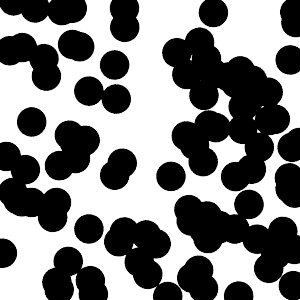

In [16]:
render.render_disk_frame(snap, 10)

In [41]:
particles = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [-1, 0, 0], [0, -1, 0], [-1, -1, 0]], dtype=np.float32)
particles -= np.mean(particles, axis=0)
xmax = np.max(np.abs(particles[:, 0]))
ymax = np.max(np.abs(particles[:, 1]))
box = [8*xmax, 8*ymax, 0, 0, 0, 0]

In [21]:
snap = gsd.hoomd.Snapshot()
snap.particles.position = particles
snap.particles.diameter = 0.5*np.ones(len(particles))

In [22]:
box

[4.0, 4.0, 0, 0, 0, 0]

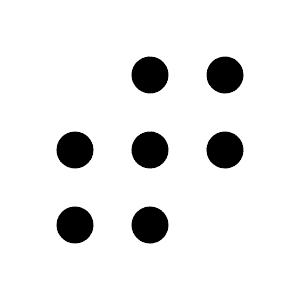

In [23]:
render.render_disk_frame(snap, 4)

In [43]:
freud_box = freud.box.Box.from_box(box)
freud_box.periodic = True

In [44]:
freud_box.periodic

array([ True,  True,  True])

In [45]:
aabb_query = freud.locality.AABBQuery(freud_box, particles)
nlist = aabb_query.query(particles, {"mode": "ball", "r_max": 3.0}).toNeighborList()


In [48]:
for i, j in zip(nlist.query_point_indices, nlist.point_indices):
    print(i, j)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6


In [49]:
nlist.query_point_indices

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6], dtype=uint32)

In [54]:
for idx, (segment, counts) in enumerate(zip(nlist.segments, nlist.neighbor_counts)):
    print(nlist.distances[segment:segment + counts])
    for i in range(segment, segment + counts):
        print(idx, nlist.distances[i])

[0.        1.        1.        1.4142135 1.        1.        1.4142135]
0 0.0
0 1.0
0 1.0
0 1.4142135
0 1.0
0 1.0
0 1.4142135
[1.        0.        1.4142135 1.        2.        1.4142135 2.236068 ]
1 1.0
1 0.0
1 1.4142135
1 1.0
1 2.0
1 1.4142135
1 2.236068
[1.        1.4142135 0.        1.        1.4142135 2.        2.236068 ]
2 1.0
2 1.4142135
2 0.0
2 1.0
2 1.4142135
2 2.0
2 2.236068
[1.4142135 1.        1.        0.        2.236068  2.236068  2.828427 ]
3 1.4142135
3 1.0
3 1.0
3 0.0
3 2.236068
3 2.236068
3 2.828427
[1.        2.        1.4142135 2.236068  0.        1.4142135 1.       ]
4 1.0
4 2.0
4 1.4142135
4 2.236068
4 0.0
4 1.4142135
4 1.0
[1.        1.4142135 2.        2.236068  1.4142135 0.        1.       ]
5 1.0
5 1.4142135
5 2.0
5 2.236068
5 1.4142135
5 0.0
5 1.0
[1.4142135 2.236068  2.236068  2.828427  1.        1.        0.       ]
6 1.4142135
6 2.236068
6 2.236068
6 2.828427
6 1.0
6 1.0
6 0.0


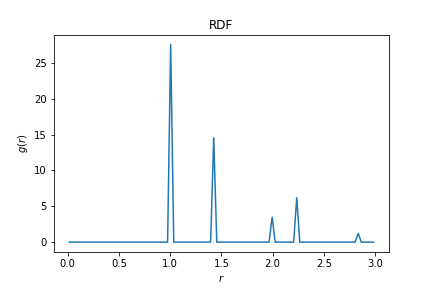

<Figure size 432x288 with 0 Axes>

In [37]:
rdf = freud.density.RDF(bins=100, r_max=3.0)
rdf.compute((freud_box, particles))